In this example, ﻿Z﻿ = the likelihood of a biking accident, ﻿Y﻿ = speed, and ﻿X﻿ = trail difficulty. We assume that ﻿X﻿ decreases ﻿Y﻿ causally because people decrease their speed on difficult trails. In addition, ﻿Y﻿ and ﻿X﻿ both increase ﻿Z﻿ causally because fast biking on difficult trails leads to accidents. Difficulty will be on a scale from 0 to 1, speed in miles per hour, and likelihood of an accident also on a scale from 0 to 1. (Based on the numbers, I'd say these trails are quite challenging!)

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# Run linear regression on bootstrap samples of the data
def bootstrap_sample(n_samples=1000):
    results = []  # Collect results in a list for efficiency
    for i in range(n_samples):
        num = 100 
        difficulty = np.random.uniform(0, 1, (num,)) 
        speed = np.maximum(np.random.normal(15, 5, (num, )) - difficulty * 10, 0) 
        accident = np.minimum(np.maximum(0.03 * speed + 0.4 * difficulty + np.random.normal(0, 0.3, (num,)), 0), 1) 
        df = pd.DataFrame({'difficulty': difficulty, 'speed': speed, 'accident': accident})

        sample = df.sample(n=50, replace=False)
        X = sm.add_constant(sample['difficulty'])
        y = sample['speed']
        model = sm.OLS(y, X).fit()
        
        # Append the index and difficulty coefficient to the results list
        results.append({'index': i, 'difficulty': model.params['difficulty']})
    
    return pd.DataFrame(results)

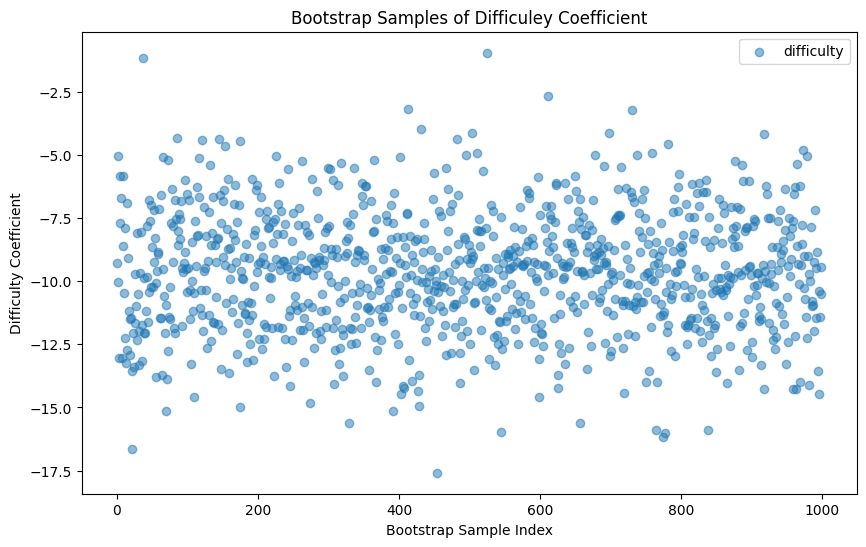

index         499.500000
difficulty     -9.648595
dtype: float64

In [3]:
diff_coef = bootstrap_sample(n_samples=1000)

# Plot the results of the bootstrap
plt.figure(figsize=(10,6))
plt.scatter(data=diff_coef, x='index', y='difficulty', alpha=.5)
plt.title('Bootstrap Samples of Difficuley Coefficient')
plt.xlabel("Bootstrap Sample Index")
plt.ylabel("Difficulty Coefficient")
plt.legend()
plt.show()

diff_coef.mean()

In [4]:
# Run linear regression on bootstrap samples of the data
def bootstrap_sample_2(n_samples=1000):
    results = []  # Collect results in a list for efficiency
    for i in range(n_samples):
        num = 100 
        difficulty = np.random.uniform(0, 1, (num,)) 
        speed = np.maximum(np.random.normal(15, 5, (num, )) - difficulty * 10, 0) 
        accident = np.minimum(np.maximum(0.03 * speed + 0.4 * difficulty + np.random.normal(0, 0.3, (num,)), 0), 1) 
        df = pd.DataFrame({'difficulty': difficulty, 'speed': speed, 'accident': accident})

        sample = df.sample(n=50, replace=False)
        X = sm.add_constant(sample[['difficulty','accident']])
        y = sample['speed']
        model = sm.OLS(y, X).fit()
        
        # Append the index and difficulty coefficient to the results list
        results.append({'index': i, 'difficulty': model.params['difficulty']})
    
    return pd.DataFrame(results)

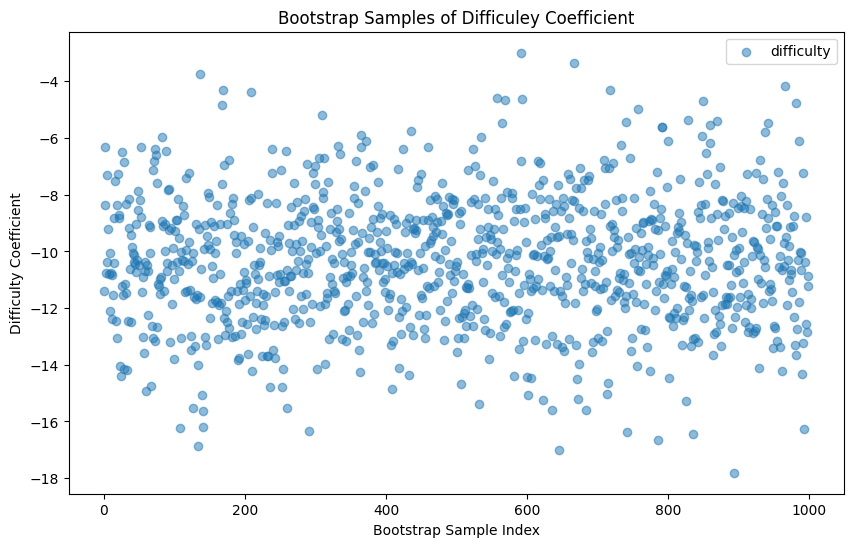

index         499.500000
difficulty    -10.335702
dtype: float64

In [5]:
# Find the average difficulty using the new bootstrap function
diff_coef_2 = bootstrap_sample_2(n_samples=1000)

# Plot the results of the bootstrap
plt.figure(figsize=(10,6))
plt.scatter(data=diff_coef_2, x='index', y='difficulty', alpha=.5)
plt.title('Bootstrap Samples of Difficuley Coefficient')
plt.xlabel("Bootstrap Sample Index")
plt.ylabel("Difficulty Coefficient")
plt.legend()
plt.show()

diff_coef_2.mean()